In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import os

# Wybierz 10 klas

Poniżej przygotuj listę 10 klas z:
https://quickdraw.withgoogle.com/data

> nazwy takie jak nazwy obiektów (wyświetlane po najechaniu lub kliknięciu)

In [2]:
class_names=['laptop', 'frog', 'mermaid','cat', 'yoga', 'apple', 'castle', 'computer', 'cow', 'face']

## Test

In [3]:
assert len(class_names)==10, 'Nazw powinno być dokładnie 10'
for i in range(len(class_names)):
    assert type(class_names[i])==str, 'Każda z nazw powinna być typu str'
    assert '/' not in class_names[i], 'Same nazwy klas, ze spacjami, bez ukośników'

# Wczytanie danych
Pobieranie plików z obrazami w formaci npy (numpy)

In [4]:
for name in class_names:
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/%s.npy'%name
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy ==> laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy ==> frog.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mermaid.npy ==> mermaid.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy ==> cat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/yoga.npy ==> yoga.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy ==> apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/castle.npy ==> castle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/computer.npy ==> computer.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cow.npy ==> cow.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/face.npy ==> face.npy


## Wczytywanie z plików .npy
Dane znajdziesz w tablicy data

In [5]:
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print('%-15s'%name,type(data[-1]))

laptop          <class 'numpy.ndarray'>
frog            <class 'numpy.ndarray'>
mermaid         <class 'numpy.ndarray'>
cat             <class 'numpy.ndarray'>
yoga            <class 'numpy.ndarray'>
apple           <class 'numpy.ndarray'>
castle          <class 'numpy.ndarray'>
computer        <class 'numpy.ndarray'>
cow             <class 'numpy.ndarray'>
face            <class 'numpy.ndarray'>


In [6]:
class_names

['laptop',
 'frog',
 'mermaid',
 'cat',
 'yoga',
 'apple',
 'castle',
 'computer',
 'cow',
 'face']

# Liczebności i wymiary zdjęć
Wypisz nazwę i shape dla każdej klasy

In [7]:
img_array = []
for name in class_names:
    file_name = name+'.npy'
    img = np.load(file_name)
    img_array.append(img)
    print('%-15s'%name, img.shape)

laptop          (261501, 784)
frog            (159047, 784)
mermaid         (180304, 784)
cat             (123202, 784)
yoga            (280442, 784)
apple           (144722, 784)
castle          (122534, 784)
computer        (123885, 784)
cow             (123083, 784)
face            (161666, 784)


Poniżej zwizualizuj liczbę zdjęć per klasę:

In [8]:
nr_images = []
for img in img_array:
    nr_images.append(int(img.shape[0]))   

In [9]:
nr_images

[261501,
 159047,
 180304,
 123202,
 280442,
 144722,
 122534,
 123885,
 123083,
 161666]

<BarContainer object of 10 artists>

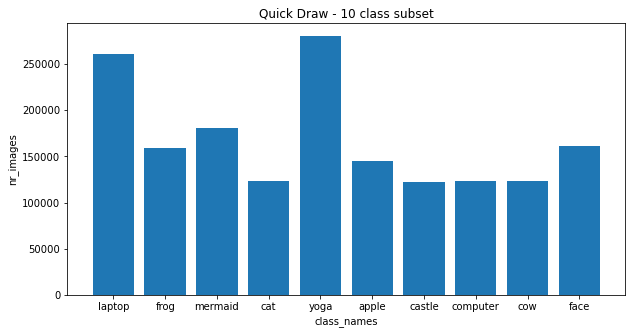

In [10]:
plt.figure(figsize=(10, 5))
plt.title('Quick Draw - 10 class subset')
plt.xlabel('class_names')
plt.ylabel('nr_images')
plt.bar(class_names, nr_images)

# Wizualizacja danych
Dane są w macierzach dwuwyamirowych,
aby je poprawnie wyświetlić jako obraz,
należy je przekonwertować do 3 wymiarów:

- numer zdjęcia
- wysokość
- szerokość

Tu pomoże `reshape` z numpy.

## Konwersja do (-1, 28, 28)

In [11]:
# robię kopię danych z reshapowanymi obrazkami
data_res = []
for name in class_names:
    file_name = name+'.npy'
    img = np.load(file_name, fix_imports=True, allow_pickle=True)
    img_res = img.reshape(-1,28,28)
    data_res.append(img_res)   

In [12]:
# sprawdzam
img_res.shape

(161666, 28, 28)

Wyświetl po jednym przykładzie z każdej klasy.

Możesz skorzystać z `plt.subplot`

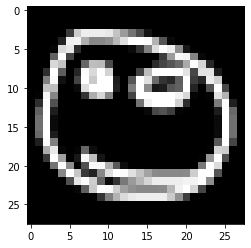

In [13]:
# sprawdzam czy się wyświetla
plt.imshow(img_res[0], cmap='gray', vmin=0, vmax=255)

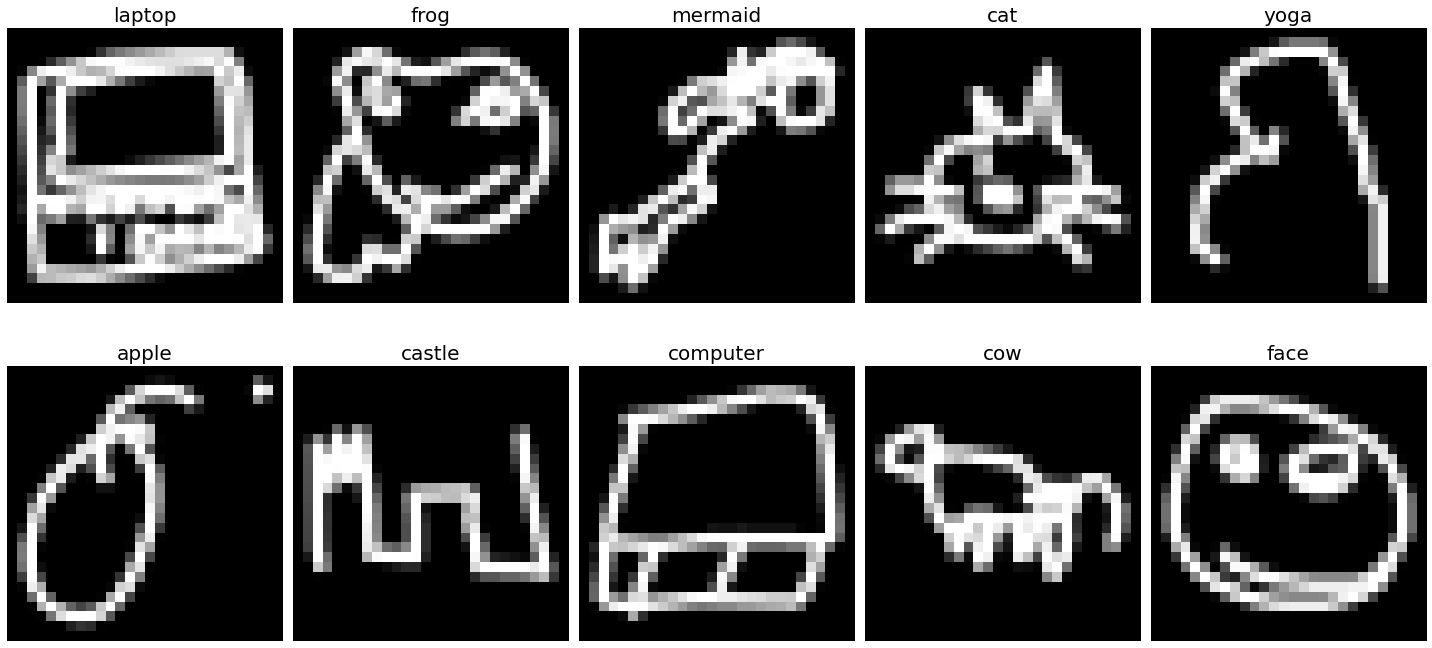

In [14]:
plt.figure(figsize=(20,10))
for i, img_res in enumerate(data_res):   
    plt.subplot(2,5, i+1)
   
    plt.title(class_names[i], fontsize=20)
    plt.imshow(img_res[0], cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
plt.tight_layout()

## Obraz średni
Jak podobne do siebie są obrazy z poszczególnych klas?

Oblicz i wyświetl średni obraz dla wszystkich klas.

Możesz skorzystać z `np.mean`

In [15]:
# wywalało błędy odnośnie shape, więc sprawdzam shape
x = np.mean(img_res, axis = 0)
x.shape

(28, 28)

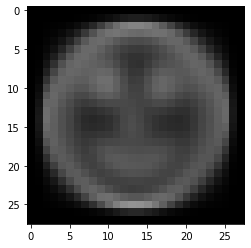

In [16]:
plt.imshow(x, cmap='gray', vmin=0, vmax=255)

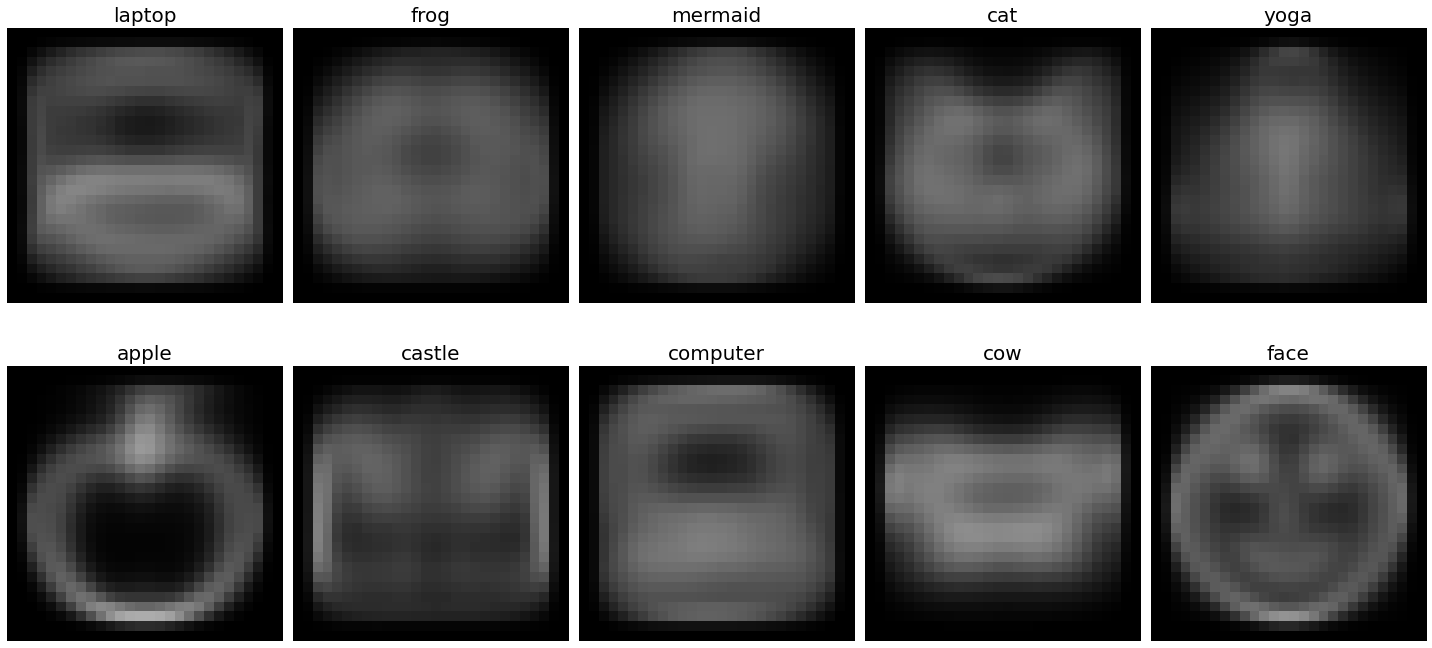

In [17]:
plt.figure(figsize=(20,10))
for i, img_res in enumerate(data_res):   
    plt.subplot(2,5, i+1)
    
    x = np.mean(img_res, axis = 0)
    
    plt.title(class_names[i], fontsize=20)
    plt.imshow(x, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
plt.tight_layout()